# [0] 개요

- 포지션
    - AI > 머신러닝 > 지도학습 > 분류

<br/>

- 의미
    - 분류 알고리즘이 학습을 수행한 후 그 성능을 평가하는 도구/지표/방법

<br/>

- 도구
    - 혼동행렬(오차행렬)을 이용해서 평가 잣대 구성

# [1] 혼동행렬 (Confusion Matrix)

## [1-1] 구성


  


- 4개 조합 (2 x 2)
- 공통 요소
    - Positive : 긍정, P
    - Negative : 부정, N

- 판단 요소
    - True : T, 예측(predict)한 값과 실제(real or actual)가 동일
    - False : F, 예측(predict)한 값과 실제(real or actual)가 상이

## [1-2] 케이스

- 주의사항 : 명제에 대해 실제 상황이 긍정일 수도, 부정적일 수도 있음. 명제 텍스트가 가지는 실제 상황에 감정 이입을 하지 않는다 -> 혼동 상황을 벗어날 수 있다

- 명제
    - 암이 있다 : Positive, P
    - 암이 없다 : Negative, N
    - 총 케이스
        - TP, TN, FP, FN

        

- TP
    - 암이 있다고 예측했는데 실제로 암이 있었다.

<br/>

- TN
    - 암이 없다고 예측, 실제 암 없음

<br/>

- FP
    - 암이 있다고 예측했지만, 실제 암 없음
    - Type 1 error : 1종 오류
    - 귀무가설은 실제 참이지만, 귀무가설을 기각하는 오류

<br/>

- FN
    - 암이 없다고 예측했지만 실제 암 있음
    - Type 2 error : 2종 오류
    - 귀무가설은 실제 거짓이지만, 귀무가설을 채택하는 오류


### [1-2-1] 정확도

- accuracy
- 식 = (TP + TN) / (TP + TN + FP + FN)
- 식 = (예측값과 실제값이 동일한 개수) / (예측한 총 건수)
- 모델이 입력한 데이터에 대해 얼마나 정확하게 예측하는지는 가늠하는 값(지표), 예측이 현실에 부합하는 확률

### [1-2-2] 정밀도

- precision
- 식 = () / (TP + FP)
- 식 = (예측과 실제가 일치한 건수) / (p라고 응답한 전체 비율(건수))
- 암이라고 진단한 총 케이스 중 실제 암이 존재하는 비율

### [1-2-3] 재현율(recall) or 민감도(sensitivity)

- 식 = (TP) / (TP + FN) => 참 긍정 비율(TPR)
- 식 = (암을 잘 진단한 케이스) / (실제 암이 존재했던 케이스의 총수)
- 이 병원은 암환자를 잘 찾아낸다
- 거짓 부정 비율(FNR) = 1 - R

###[1-2-4] 특이성 (특이도)

- specificity
- 실제 암이 없는 전체 데이터 중 실제 암이 없다는 것을 맞춘 비율
- 식(S) = TN / (TN + FP) => 참 부정 비율(TNR)
- 거짓 긍정 비율 (FTR) = 1 - S

###[1-2-5] F1-score
- 조화 평균
- 용도
    - 모델 성능을 판단하는데 P or R 둘중 어느쪽에 비중을 둬야 할지 모른다면 사용
    - P와 R 사이에 반비례 상황이 빈번하게 발생한다면 이를 보정하기 위해서라도 사용
- F1 = 2 / (1/P + 1/R)
- F1 = 2(PR) / (R + P)

###[1-2-6] ROC-커브 (곡선)

- Receiver Operating Characteristic Curve
- 2차원 도표
- 비슷한 성능을 가진 여러 모델들을 비교 평가하기 위해서 사용 => 이를 통해 더 좋은 모델이 무엇인지 평가
- X축은 거짓 긍정 비율, y축은 참 긍정 비율(TPR) : 민감도 배치
- 값은 0 ~ 1 범위
- 시각화로 그리지만, 애매하게 찾기가 어렵다
- AUC 값을 활용하여 최종 모델을 선별







### 정리

- 타겟(정답)의 값으로 예측시 - 정확도, 정밀도, 재현율, F1-score
- 타겟(정답)의 확륙로 예측시 - Auc, 로그손실

## [1-3] 지표별 우선순위

- case 1
    - 비가 오는날 예측하는 모델
    - 실제 100일동안 3일만 비가 왔다
    - 모델은 100일동안 비가 않온다고 예측
        - 정확도 = 97 / 100 => 97%
        - 비오는날을 한번도 못맞췄다

- case 2
    - 스팸 메일 분류 모델
    - 메일 100개, 스팸이 5개
    - 100개 모두 정상 => 정확도 95% => 스팸은 못찾음

- 굿케이스
    - 암환자 예측, 보험 사기 예측
        - 적발 하는 모델
        - 재현율, 민감도 중요
    - 스팸 메일 분류
        - 정밀도
    - 전체 데이터 대비 중요한 데이터가 소량으로 존재한다면,
        - f1-SCORE가 중요
    - 가장 좋은 케이스
        - 모든 지표가 높다

# [2] 타겟값 기준으로 분류 평가

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

- 데이터 획득
    - sklearn에서는 다음 함수로 제공
        - fetch_XXX()
            - 데이터가 커서, 요청시 다운로드
            - 주로 이미지 계열
        - load_XXX()
            - 패키지 설치시 바로 다운로드 되어 있음
        - make_XXX()
            - 더미 데이터를 생성
            - 분류, 회귀, 분포 등등 설정 생성

## 데이터 획득

- sklearn에서 제공하는 iris 사용
- 분류, 종이 3개

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# 데이터 획득
raw_data = load_iris()
print(raw_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 데이터 준비, 분석, EDA

In [3]:
type(raw_data) # sklearn.utils._bunch.Bunch <- 사이킷런 패키지에서 연습용 제공되는 데이터 포멧
dir(raw_data)
'''
[
 'DESCR', -> 설명
 'data', -> 데이터
 'data_module',
 'feature_names', -> 특성(피처) 이름
 'filename', -> 파일명
 'frame',
 'target', -> 정답 데이터
 'target_names' -> 정답의 이름들
 ]

'''

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
raw_data.feature_names, raw_data.target_names, raw_data.data.shape, raw_data.target.shape

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 (150, 4),
 (150,))

In [7]:
# 데이터 프레임 구성
df = pd.DataFrame(raw_data.data, columns = raw_data.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [8]:
# 정답 데이터
raw_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# 파생 변수, 정답 레이블 추가, 칼럼명 species
df['species'] = raw_data.target

- EDA등 기본 분석, 통계 요약 등등 생략
- 피처 엔지니어링 등 생략

## 모델 구축(성능평가에 집중해서)

- 여러 모델을 이용하여 동시에 순차적으로 학습 -> 더 좋은 모델을 찾겠다. -> ROC-AUC
- 단 최적화는 하지 않는다!

#### 훈련데이터 준비
  - 훈련 : 테스트 =  75:25

In [13]:
from sklearn.model_selection import train_test_split
X =  df.iloc[:,:-1] # 2차원 리스트, 배열, df 등 ok
y =  df.species # 1차원, 리스트, 배열, Series

X.shape, y.shape
# y는 정답, 0/1/2의 값을 가짐 -> 다중 준류 -> 이진분류로 변경(컨셉)

((150, 4), (150,))

In [14]:
y_ = y==1
y_

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [16]:
# 정답의 개수, False는 100개 True는 50개 -> 정답이 불균형하다.=> 층화 처리 필요
tmp = df.iloc[:,-1:] == 1
tmp.groupby(['species']).size()

species
False    100
True      50
dtype: int64

In [17]:
# random_state : 난수의 씨드 => 데이터가 셔플하고 추출될 때 일정한 패턴으로 동일하게 추출된다.
# 학습시 재현성에 대한 이슈 => 학습률 높이기 위한 전략
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.25, random_state = 100)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [19]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [32]:
# 분류된 y데이터의 종류별 개수
import numpy as np

# 배열로 처리한다면
np.unique(y_train.values, return_counts = True)

# 원데이터와 비교해보니 정답비율이 불균형하다 => 신뢰성, 훈련효과 등등 문제가 발생한다.

(array([False,  True]), array([72, 40]))

In [33]:
# 알고리즘 사용
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 (이진 분류 베이스라인 용도)
from sklearn.tree import DecisionTreeClassifier # 결정트리, 다중 분류, 앙상블 기본 베이스
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트(동일 알고리즘 n개(결정트리) 강한 분류기 구성)
from sklearn.naive_bayes import GaussianNB # 가우시안 나이브 베이즈 (데이터 텍스트라면)
from sklearn.svm import SVC # 서포트 백터 머신, 이진분류용

#### 알고리즘 선택

In [43]:
als = {
    'LogisticRegression'    : ( LogisticRegression(), '-'),
    'DecisionTreeClassifier': ( DecisionTreeClassifier(max_depth=5), '--'),
    'RandomForestClassifier': ( RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10), '.-'),
    'GaussianNB'            : ( GaussianNB(), ':'),
    'SVC'                   : ( SVC(probability=True), '-'),
}

#### 반복적으로 수행

- 학습, 예측, 성능평가, 시각화 <= 반복

In [38]:
# 평가도구
from sklearn.metrics import roc_curve, auc # 여러 모델을 성능평가 비교해서 최적 모델을 추출

LogisticRegression 0.8
DecisionTreeClassifier 0.9321428571428572
RandomForestClassifier 0.994642857142857
GaussianNB 0.9678571428571429
SVC 0.9928571428571429


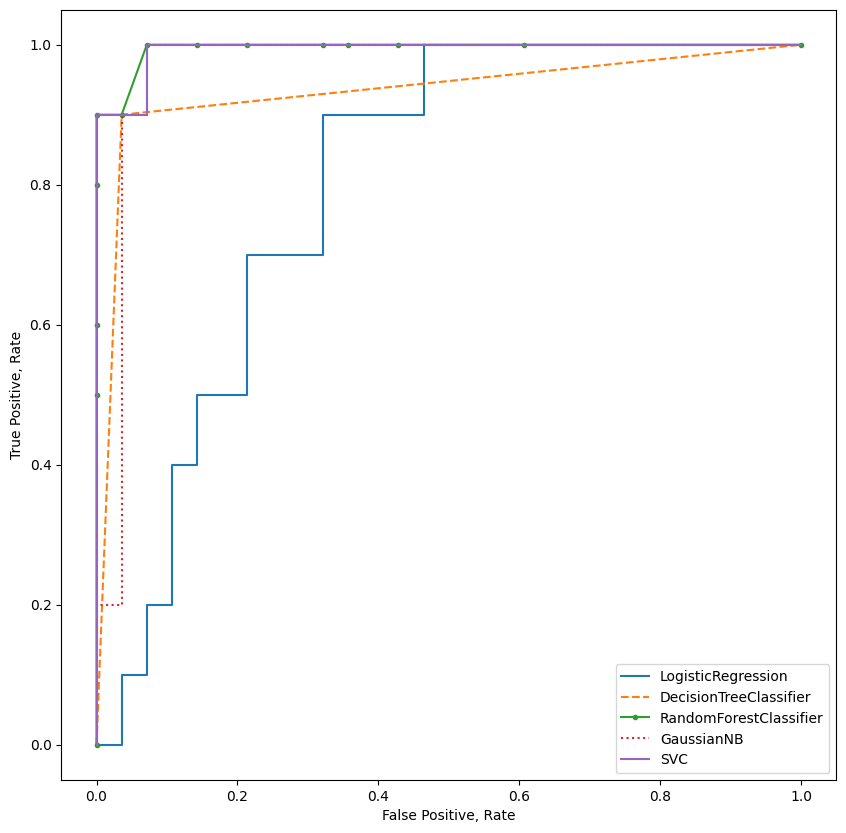

In [44]:
# 차트의 모양
plt.figure(figsize=(10,10))

# 반복
for model_name, ( model, line_style)  in als.items():
    #print( key, model, line_style)
    # 학습
    model.fit( X_train, y_train )
    # 예측 ->predict_proba() => True(1)예측할 확률이 출력 [ F를 예측할 확률 , T를 예측할 확률 ]
    pred     = model.predict_proba( X_test )
    # 성능평가
    pred_t   = pred[ : , -1 ]         # T를 예측할 확률만 추출했음
    #print( y_test.values )
    #print( pred_t )
    fpr, tpr, _ = roc_curve(y_test.values, pred_t)  # (배열,배열)
    # auc:곡면하(밑에) 면적을 계산 비교 전략
    print( model_name, auc(fpr, tpr))
    # 시각화 (x축데이터, y축데이터, 선모양, 범례)
    plt.plot( fpr, tpr, line_style, label=model_name)

# 플로팅
plt.legend()
plt.xlabel('False Positive, Rate')
plt.ylabel('True Positive, Rate')

# 차트 출력
plt.show()

## 정답 분포 조절

In [42]:
# 층화 처리 stratify = 기준값
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.25, random_state = 100, stratify=y_)


In [45]:
# 시리즈값 카운트 -> 좀더 균등하게 분포되었음!
y_train.value_counts(), y_test.value_counts()

(False    72
 True     40
 Name: species, dtype: int64,
 False    28
 True     10
 Name: species, dtype: int64)

LogisticRegression 0.8
DecisionTreeClassifier 0.9321428571428572
RandomForestClassifier 0.9660714285714286
GaussianNB 0.9678571428571429
SVC 0.9928571428571429


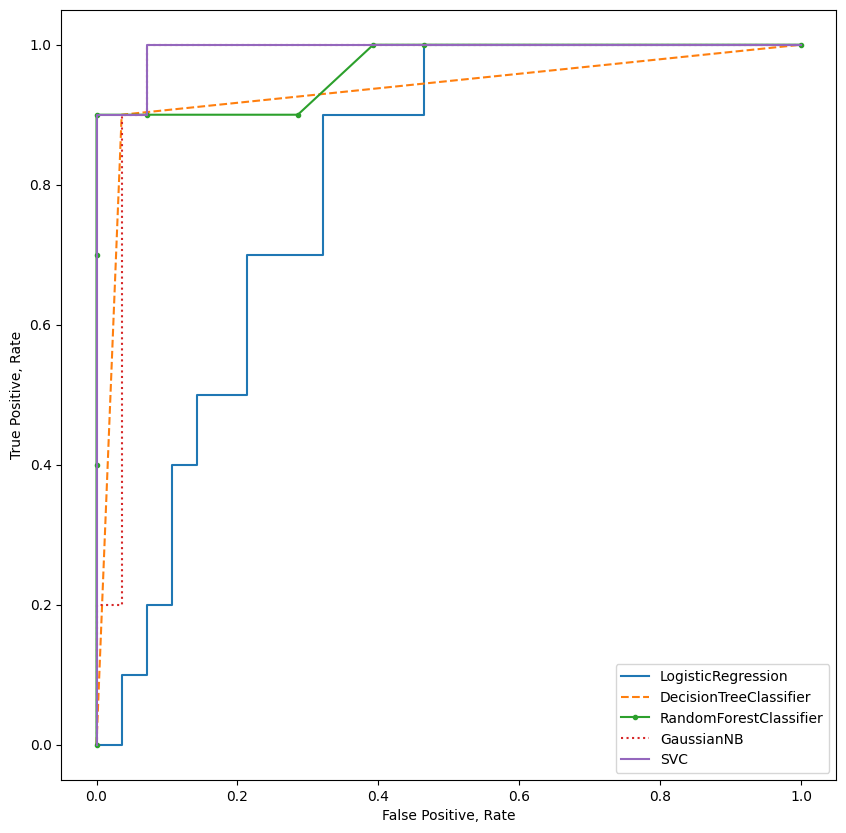

In [47]:
als = {
    'LogisticRegression'    : ( LogisticRegression(), '-'),
    'DecisionTreeClassifier': ( DecisionTreeClassifier(max_depth=5), '--'),
    'RandomForestClassifier': ( RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10), '.-'),
    'GaussianNB'            : ( GaussianNB(), ':'),
    'SVC'                   : ( SVC(probability=True), '-'),
}

# 차트의 모양
plt.figure(figsize=(10,10))

# 반복
for model_name, ( model, line_style)  in als.items():
    model.fit( X_train, y_train )
    pred     = model.predict_proba( X_test )
    pred_t   = pred[ : , -1 ]
    fpr, tpr, _ = roc_curve(y_test.values, pred_t)
    print( model_name, auc(fpr, tpr))
    plt.plot( fpr, tpr, line_style, label=model_name)

plt.legend()
plt.xlabel('False Positive, Rate')
plt.ylabel('True Positive, Rate')

plt.show()

# 정답 데이터 분포가 불균형할 떄 비해 성능은 더 향상되었다 (상대적인것)
# 현재 결과로는 과적합 => 데이터를 더 늘려서 수행